# Solvers ⚙️

In this exercise, you will investigate the effects of different `solvers` on `LogisticRegression` models.

👇 Run the code below to import the dataset

In [1]:
import pandas as pd

df = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/solvers_dataset.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality rating
0,9.47,5.97,7.36,10.17,6.84,9.15,9.78,9.52,10.34,8.80,6
1,10.05,8.84,9.76,8.38,10.15,6.91,9.70,9.01,9.23,8.80,7
2,10.59,10.71,10.84,10.97,9.03,10.42,11.46,11.25,11.34,9.06,4
3,11.00,8.44,8.32,9.65,7.87,10.92,6.97,11.07,10.66,8.89,8
4,12.12,13.44,10.35,9.95,11.09,9.38,10.22,9.04,7.68,11.38,3


In [2]:
df.shape

(100000, 11)

In [3]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol', 'quality rating'],
      dtype='object')

- The dataset consists of different wines 🍷
- The features describe different properties of the wines 
- The target 🎯 is a quality rating given by an expert

## 1. Target engineering

In this section, you are going to transform the ratings into a binary target.

👇 How many observations are there for each rating?

In [4]:
# YOUR CODE HERE
rating_counts_all_columns = df.groupby('quality rating').count()

rating_counts_all_columns


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
quality rating,,,,,,,,,,
1,10090,10090,10090,10090,10090,10090,10090,10090,10090,10090
2,10030,10030,10030,10030,10030,10030,10030,10030,10030,10030
3,9838,9838,9838,9838,9838,9838,9838,9838,9838,9838
4,9928,9928,9928,9928,9928,9928,9928,9928,9928,9928
5,10124,10124,10124,10124,10124,10124,10124,10124,10124,10124
6,9961,9961,9961,9961,9961,9961,9961,9961,9961,9961
7,9954,9954,9954,9954,9954,9954,9954,9954,9954,9954
8,9977,9977,9977,9977,9977,9977,9977,9977,9977,9977
9,9955,9955,9955,9955,9955,9955,9955,9955,9955,9955


❓ Create `y` by transforming the target into a binary classification task where quality ratings below 6 are bad [0], and ratings of 6 and above are good [1]

In [5]:
# YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder

In [17]:
encoder = LabelEncoder()

df['binary_rating'] = encoder.fit_transform(df['quality rating'])

df['binary_rating'] = df['binary_rating'].apply(lambda x: 1 if x == 6 else 0)

df



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality rating,binary_rating
0,9.47,5.97,7.36,10.17,6.84,9.15,9.78,9.52,10.34,8.80,6,0
1,10.05,8.84,9.76,8.38,10.15,6.91,9.70,9.01,9.23,8.80,7,1
2,10.59,10.71,10.84,10.97,9.03,10.42,11.46,11.25,11.34,9.06,4,0
3,11.00,8.44,8.32,9.65,7.87,10.92,6.97,11.07,10.66,8.89,8,0
4,12.12,13.44,10.35,9.95,11.09,9.38,10.22,9.04,7.68,11.38,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6.93,4.49,8.25,8.60,9.41,11.07,8.38,10.89,12.42,8.99,7,1
99996,10.57,9.56,9.83,8.98,9.77,10.04,10.87,11.28,9.57,8.97,10,0
99997,10.23,10.98,11.74,11.76,8.87,9.03,9.93,9.86,10.04,8.66,2,0
99998,7.25,3.95,7.03,8.90,8.49,9.75,11.45,10.21,8.32,9.44,8,0


In [19]:
y = df.drop(columns = ['quality rating'])
y

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,binary_rating
0,9.47,5.97,7.36,10.17,6.84,9.15,9.78,9.52,10.34,8.80,0
1,10.05,8.84,9.76,8.38,10.15,6.91,9.70,9.01,9.23,8.80,1
2,10.59,10.71,10.84,10.97,9.03,10.42,11.46,11.25,11.34,9.06,0
3,11.00,8.44,8.32,9.65,7.87,10.92,6.97,11.07,10.66,8.89,0
4,12.12,13.44,10.35,9.95,11.09,9.38,10.22,9.04,7.68,11.38,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,6.93,4.49,8.25,8.60,9.41,11.07,8.38,10.89,12.42,8.99,1
99996,10.57,9.56,9.83,8.98,9.77,10.04,10.87,11.28,9.57,8.97,0
99997,10.23,10.98,11.74,11.76,8.87,9.03,9.93,9.86,10.04,8.66,0
99998,7.25,3.95,7.03,8.90,8.49,9.75,11.45,10.21,8.32,9.44,0


❓ Check the class balance of the new binary target

In [23]:
# YOUR CODE HERE
class_balance = y['binary_rating'].value_counts(normalize=True)
class_balance

0    0.90046
1    0.09954
Name: binary_rating, dtype: float64

❓ Create your `X` by normalising the features. This will allow for fair comparison of different solvers.

In [24]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import seaborn as sns

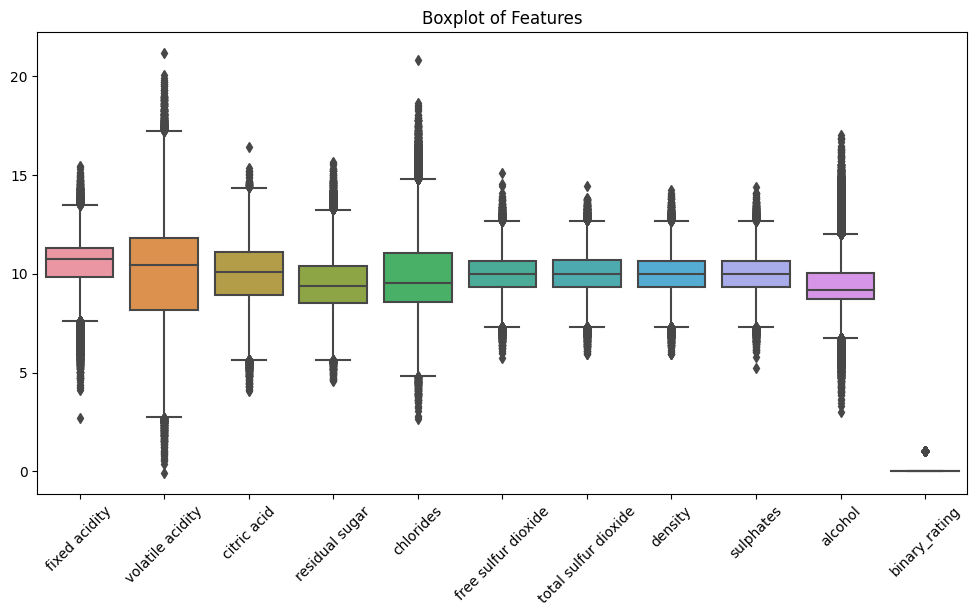

In [26]:
# YOUR CODE HERE
plt.figure(figsize=(12, 6))
sns.boxplot(data=y)
plt.xticks(rotation=45)
plt.title("Boxplot of Features")
plt.show()

I think Standard scaler makes sense here.

In [27]:
from sklearn.preprocessing import StandardScaler

In [32]:
X = y.drop(columns=['binary_rating'])

scaler = StandardScaler()

X_normalized = scaler.fit_transform(X)
X_normalized

X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
X_normalized_df
scaled_df = pd.concat([X_normalized_df,y['binary_rating']], axis = 1)
scaled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,binary_rating
0,-0.788603,-1.528461,-1.733180,0.461130,-1.526653,-0.852381,-0.221393,-0.478387,0.340231,-0.489833,0
1,-0.346860,-0.462069,-0.158290,-0.783868,0.117066,-3.102634,-0.301357,-0.986972,-0.769429,-0.489833,1
2,0.064417,0.232757,0.550411,1.017553,-0.439117,0.423432,1.457850,1.246811,1.339925,-0.307387,0
3,0.376684,-0.610695,-1.103224,0.099454,-1.015163,0.925720,-3.030126,1.067310,0.660133,-0.426679,0
4,1.229704,1.247129,0.228871,0.308113,0.583862,-0.621328,0.218409,-0.957055,-2.318954,1.320591,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,-2.723130,-2.078377,-1.149158,-0.630851,-0.250412,1.076407,-1.620762,0.887810,2.419594,-0.356507,1
99996,0.049185,-0.194543,-0.112355,-0.366550,-0.071639,0.041693,0.868116,1.276728,-0.429533,-0.370541,0
99997,-0.209768,0.333079,1.140995,1.567021,-0.518571,-0.972930,-0.071460,-0.139331,0.040323,-0.588073,0
99998,-2.479410,-2.279022,-1.949728,-0.422192,-0.707276,-0.249635,1.447854,0.209697,-1.679150,-0.040736,0


## 2. LogisticRegression solvers

❓ Logistic Regression models can be optimized using different **solvers**. Make a comparison of the available solvers':
- Fit time - which solver is **the fastest**?
- Precision - **how different** are their respective precision scores?

Available solvers for Logistic Regression are `['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']`
 
For more information on these 5 solvers, check out [this Stack Overflow thread](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions)

In [36]:
# YOUR CODE HERE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
import time

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

solvers = ['newton-cg', 'lbfgs', 'liblinear']

fit_times = []
precision_scores = []

for solver in solvers:
    start_time = time.time()
    
    model = LogisticRegression(solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    
    fit_time = time.time() - start_time
    fit_times.append(fit_time)
    
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)

print("Solver\t\tFit Time\tPrecision Score")
for i, solver in enumerate(solvers):
    print(f"{solver}\t{fit_times[i]:.6f}\t\t{precision_scores[i]:.6f}")

Solver		Fit Time	Precision Score
newton-cg	0.045767		0.876712
lbfgs	0.007666		0.876712
liblinear	0.005763		0.876712


In [37]:
# YOUR ANSWER
fastest_solver = "liblinear"

<details>
    <summary>ℹ️ Click here for our interpretation</summary>

All solvers should produce similar precision scores because our cost-function is "easy" enough to have a global minimum which is found by all 5 solvers. For very complex cost-functions such as in Deep Learning, different solvers may stopping at different values of the loss function.

**The wine dataset**
    
If you check feature importance with sklearn's <a href="https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html">permutation_importance</a> on the current dataset, you'll see many features result in almost 0 importance. Liblinear solver successively moves only along *one* direction at a time, regularizing the others with L1 regularization (a.k.a, setting their beta to 0), which might provide a good fit for a dataset where many features are not that important in predicting the target.

❗️There is a cost to searching for the best solver. Sticking with the default (`lbfgs`) may save the most time overall, sklearn provides you this grid for an idea of which solver to choose to start off with: 

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/solvers-chart.png" width=700>



</details> 

###  🧪 Test your code

In [38]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'solvers',
    fastest_solver=fastest_solver
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/04-Under-the-hood/data-solvers/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_solvers.py::TestSolvers::test_fastest_solver PASSED                 [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/solvers.pickle

git commit -m 'Completed solvers step'

git push origin master



In [39]:
! git add tests/solvers.pickle

! git commit -m 'Completed solvers step'

! git push origin master


[master 8f7f3c0] Completed solvers step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/solvers.pickle
Enumerating objects: 14, done.
Counting objects: 100% (14/14), done.
Delta compression using up to 4 threads
Compressing objects: 100% (13/13), done.
Writing objects: 100% (14/14), 4.15 KiB | 1.38 MiB/s, done.
Total 14 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), done.
To github.com:juliensoudet/data-solvers.git
 * [new branch]      master -> master


## 3. Stochastic Gradient Descent

Logistic Regression models can also be optimized via Stochastic Gradient Descent.

❓ Evaluate a Logistic Regression model optimized via **Stochastic Gradient Descent**. How do its precision score and training time compare to the performance of the models trained in section 2?


<details>
<summary>💡 Hint</summary>

- If you are stuck, look at the [SGDClassifier doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)!

</details>



In [13]:
# YOUR CODE HERE

☝️ The SGD model should have one of the shortest times (maybe even shorter than `liblinear`), for similar performance. This is a direct effect of performing each epoch of the Gradient Descent on a single row as opposed to loading 100k rows into memory at a time.

## 4. Predictions

❓ Use the best model (balanced with short fit time and high precision) to predict the binary quality (0 or 1) of the following wine. Store your:
- `predicted_class`
- `predicted_proba_of_class` (i.e if your model predicted a class of 1 what is the probability it believes 1 to be the class should be between 0 and 1)

In [14]:
new_wine = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/solvers_new_wine.csv')
new_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,9.54,13.5,12.35,8.78,14.72,9.06,9.67,10.15,11.17,12.17


In [15]:
# YOUR CODE HERE

# 🏁  Check your code and push your notebook

In [16]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'new_data_prediction',
    predicted_class=predicted_class,
    predicted_proba_of_class=predicted_proba_of_class
)
result.write()
print(result.check())

NameError: name 'predicted_class' is not defined